# TRABAJO FINAL DE INTELIGENCIA DE NEGOCIOS:
##**“EFECTO DEL MARKETING EN LOS HÁBITOS DE CONSUMO DE ADULTOS”**

.

  
MEDINA GASCA, SWIETENIA NAOMI, ID: 00486352


CARLOS IRVING BECERRIL VILLAVERDE, ID: 00235237


BARONA TOVAR, BENJAMIN, ID: 00491857

.

DOCENTE:
RAFAEL VILLEGAS VELASCO


INGENIERÍA EN TECNOLOGÍAS DE LA INFORMACIÓN Y NEGOCIOS DIGITALES

06 de Julio de 2025

# **Proceso ETL**

In [1]:
# Librerías usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estilo para gráficos
sns.set(style='whitegrid')

In [3]:
%matplotlib inline

In [4]:
# Leer los datasets
df_behavior = pd.read_csv('shopping_behavior_updated.csv')
df_trends = pd.read_csv('shopping_trends.csv')
df_ifood = pd.read_csv('ifood_df.csv')

In [5]:
# Función de exploración rápida
def explorar_df(df, nombre):
    print(f'\n--- {nombre} ---')
    print("Shape:", df.shape)
    print("\nColumnas:", df.columns.tolist())
    print("\nTipos de datos:\n", df.dtypes)
    print("\nValores nulos:\n", df.isnull().sum())
    print("\nPrimeras filas:\n", df.head())

explorar_df(df_behavior, "Shopping Behavior")
explorar_df(df_trends, "Shopping Trends")
explorar_df(df_ifood, "iFood")


--- Shopping Behavior ---
Shape: (3900, 18)

Columnas: ['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases']

Tipos de datos:
 Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Valores nu

In [6]:
# limpieza: quitar filas nulas completas
df_behavior.dropna(how='all', inplace=True)
df_trends.dropna(how='all', inplace=True)
df_ifood.dropna(how='all', inplace=True)

# **Gráfico #1**
Gráfica de lineas

Promedio de cantidad de compras por edad

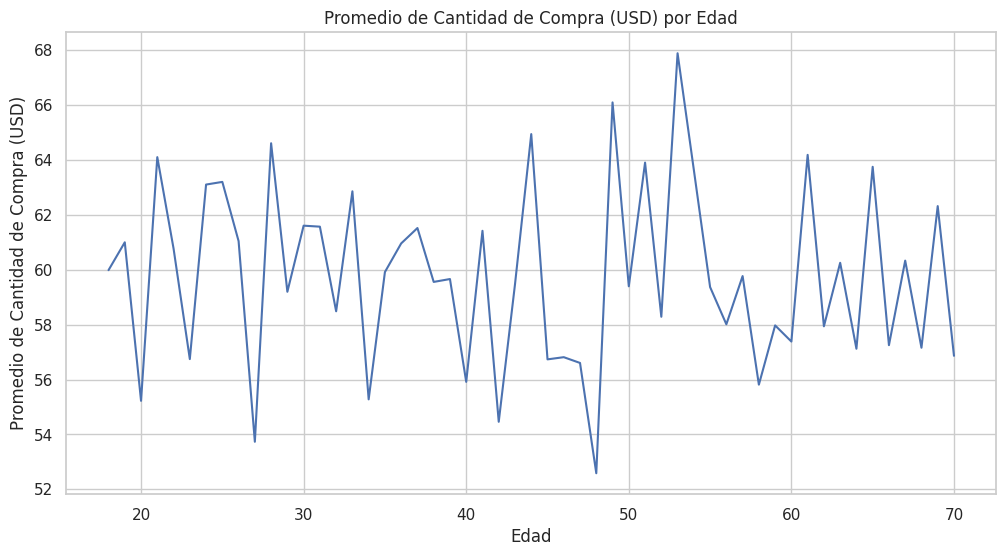

In [24]:
df_age_purchase = df_behavior.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

# Crear la gráfica de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_age_purchase, x='Age', y='Purchase Amount (USD)')
plt.title('Promedio de Cantidad de Compra (USD) por Edad')
plt.xlabel('Edad')
plt.ylabel('Promedio de Cantidad de Compra (USD)')
plt.show()

# **Gráfico #2**
Gráfica de pastel

Proporción de Clientes por Estado Marital


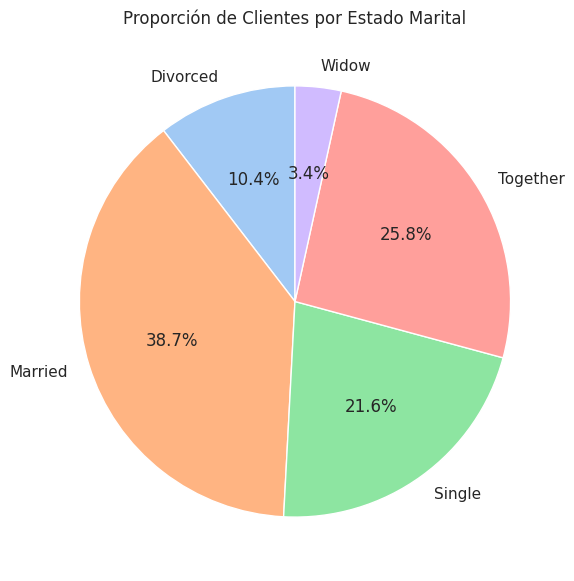

In [28]:
marital_status_counts = {}
if 'marital_Divorced' in df_ifood.columns:
    marital_status_counts['Divorced'] = df_ifood['marital_Divorced'].sum()
if 'marital_Married' in df_ifood.columns:
    marital_status_counts['Married'] = df_ifood['marital_Married'].sum()
if 'marital_Single' in df_ifood.columns:
    marital_status_counts['Single'] = df_ifood['marital_Single'].sum()
if 'marital_Together' in df_ifood.columns:
    marital_status_counts['Together'] = df_ifood['marital_Together'].sum()
if 'marital_Widow' in df_ifood.columns:
    marital_status_counts['Widow'] = df_ifood['marital_Widow'].sum()

marital_series = pd.Series(marital_status_counts)

plt.figure(figsize=(7, 7))
marital_series.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proporción de Clientes por Estado Marital')
plt.ylabel('')
plt.show()

# **Gráfico #3**

HeatMap (Mapa de calor)

Correlación entre Aceptación de Campañas y Variables Numéricas

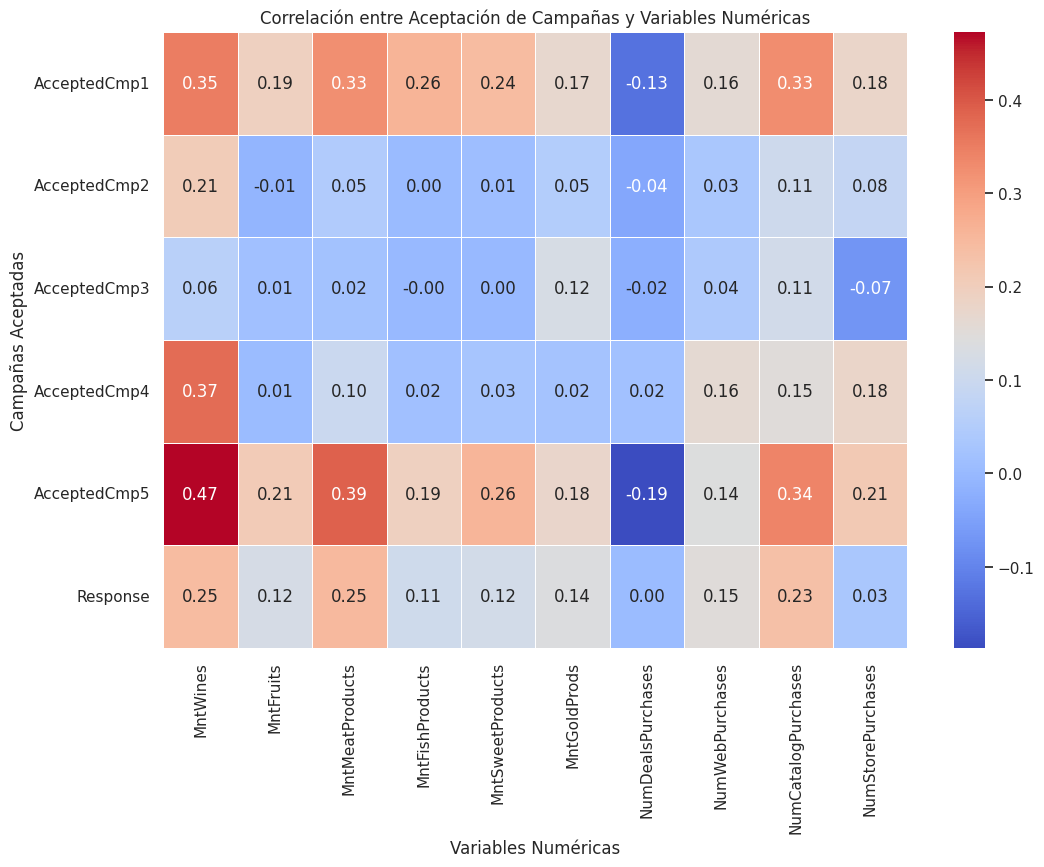

In [31]:
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
numeric_cols = [
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']


required_cols = accepted_cols + numeric_cols
missing_cols = [col for col in required_cols if col not in df_ifood.columns]

if missing_cols:
    print(f"Advertencia: Las siguientes columnas no se encontraron en df_ifood: {missing_cols}")

# Seleccionar solo las columnas presentes en df_ifood
available_cols = [col for col in required_cols if col in df_ifood.columns]
df_corr = df_ifood[available_cols].copy()

available_accepted_cols = [col for col in accepted_cols if col in df_corr.columns]
available_numeric_cols = [col for col in numeric_cols if col in df_corr.columns]

# Calcular la matriz de correlación solo si hay columnas para correlacionar
if available_accepted_cols and available_numeric_cols:
    correlation_matrix = df_corr.corr()
    correlation_accepted_vs_numeric = correlation_matrix.loc[available_accepted_cols, available_numeric_cols]

    # Crear el heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_accepted_vs_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlación entre Aceptación de Campañas y Variables Numéricas')
    plt.xlabel('Variables Numéricas')
    plt.ylabel('Campañas Aceptadas')
    plt.show()
else:
    print("No hay suficientes columnas de 'AcceptedCmp' y numéricas presentes en df_ifood para generar el heatmap.")

# **Gráfico #4**

Gráfica de dona

Proporción de Usuarios de Métodos de Pago Digitales (PayPal, Venmo) por Género

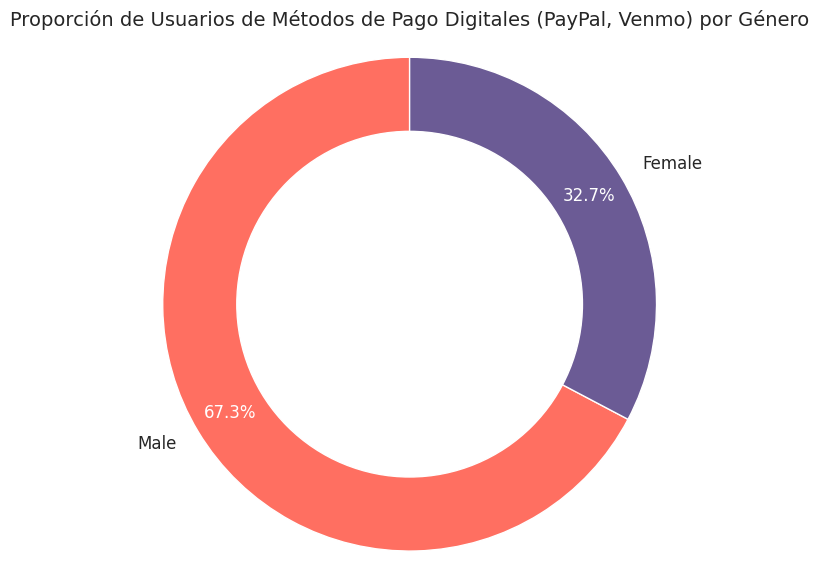

In [37]:
df_digital_payments = df_behavior[df_behavior['Payment Method'].isin(['PayPal', 'Venmo'])]

gender_counts = df_digital_payments['Gender'].value_counts()

total_women = gender_counts.get('Female', 0)
total_men = gender_counts.get('Male', 0)

# Crear el gráfico de dona
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#FF6F61', '#6B5B95'],
    pctdistance=0.85 # Distancia de los porcentajes desde el centro
)

# Crear el círculo central para convertirlo en un grafico de dona
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Mejorar el estilo de los porcentajes y etiquetas
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
for text in texts:
    text.set_fontsize(12)


plt.title('Proporción de Usuarios de Métodos de Pago Digitales (PayPal, Venmo) por Género', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Gráfico #5**

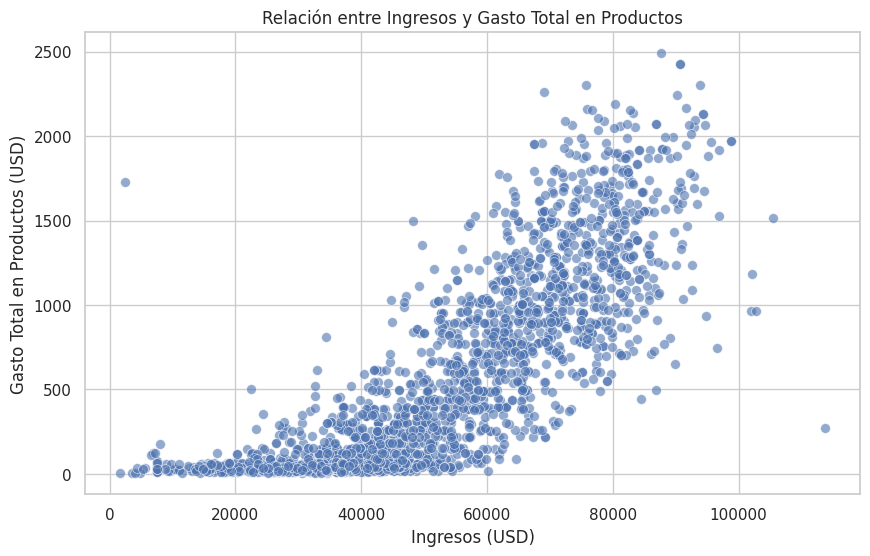

In [40]:
# Calcular el gasto total por cliente en df_ifood
if 'MntTotal' not in df_ifood.columns:
    if all(col in df_ifood.columns for col in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']):
        df_ifood['MntTotal'] = df_ifood[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
    else:
        print("Advertencia: No se pudieron encontrar todas las columnas de gasto para calcular 'MntTotal'.")
        print("Columnas de gasto esperadas: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds")
        print("Columnas disponibles en df_ifood:", df_ifood.columns.tolist())

if 'Income' in df_ifood.columns and 'MntTotal' in df_ifood.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_ifood, x='Income', y='MntTotal', alpha=0.6, s=50)
    plt.title('Relación entre Ingresos y Gasto Total en Productos')
    plt.xlabel('Ingresos (USD)')
    plt.ylabel('Gasto Total en Productos (USD)')
    plt.grid(True)
    plt.show()
else:
    print("No se pueden generar el gráfico de dispersión. Las columnas 'Income' o 'MntTotal' no están disponibles en df_ifood.")
    if 'Income' not in df_ifood.columns:
        print("Falta la columna 'Income'.")
    if 'MntTotal' not in df_ifood.columns:
        print("Falta la columna 'MntTotal' o no se pudo calcular.")

# **Supuesto #1**
¿Gastan más en promedio los clientes con suscripción activa que los que no tienen suscripción?

In [17]:
# Calcular el gasto promedio para cada grupo de suscripción
gasto_promedio_por_suscripcion = df_behavior.groupby('Subscription Status')['Purchase Amount (USD)'].mean().reset_index()
gasto_promedio_por_suscripcion.rename(columns={'Purchase Amount (USD)': 'Gasto Promedio (USD)'}, inplace=True)

print(gasto_promedio_por_suscripcion)

# Determinar que tipo de cliente gasta más
if gasto_promedio_por_suscripcion.loc[gasto_promedio_por_suscripcion['Subscription Status'] == 'Yes', 'Gasto Promedio (USD)'].iloc[0] > \
   gasto_promedio_por_suscripcion.loc[gasto_promedio_por_suscripcion['Subscription Status'] == 'No', 'Gasto Promedio (USD)'].iloc[0]:
    print("\nSí, los clientes con suscripción activa gastan más en promedio que los que no tienen suscripción.")
else:
    print("\nNo, los clientes con suscripción activa no gastan más en promedio que los que no tienen suscripción (o gastan menos/lo mismo).")

  Subscription Status  Gasto Promedio (USD)
0                  No             59.865121
1                 Yes             59.491928

No, los clientes con suscripción activa no gastan más en promedio que los que no tienen suscripción (o gastan menos/lo mismo).


# **Supuesto #2**
¿Existe una relación entre la frecuencia de compra y la temporada del año?

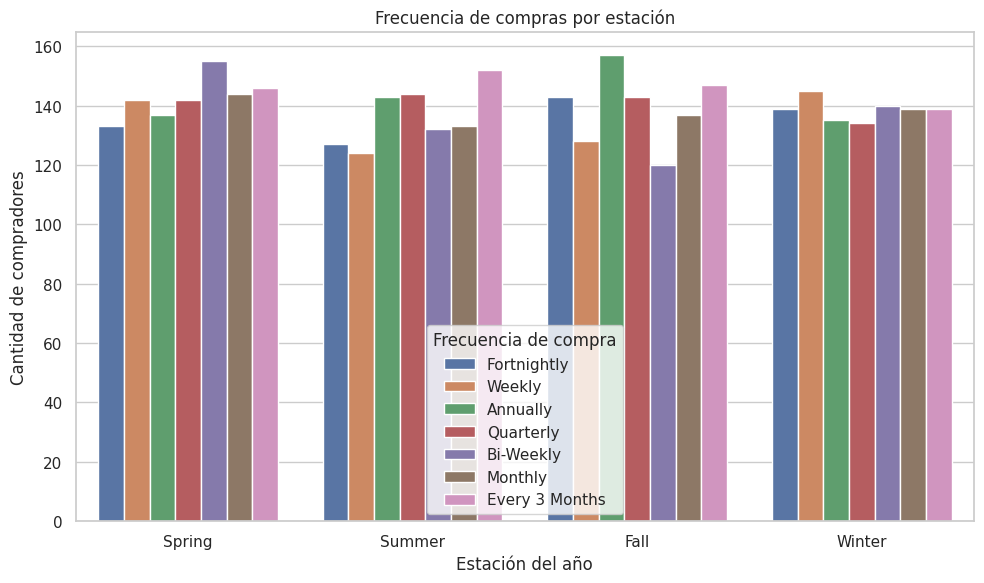

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='Season', hue='Frequency of Purchases', data=df_behavior, order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('Frecuencia de compras por estación')
plt.xlabel('Estación del año')
plt.ylabel('Cantidad de compradores')
plt.legend(title='Frecuencia de compra')
plt.tight_layout()
plt.show()


# **Supuesto #3**
En la BD de iFood, ¿las personas con hijos pequeños (Kidhome > 0) gastan más en productos dulces (MntSweetProducts)?

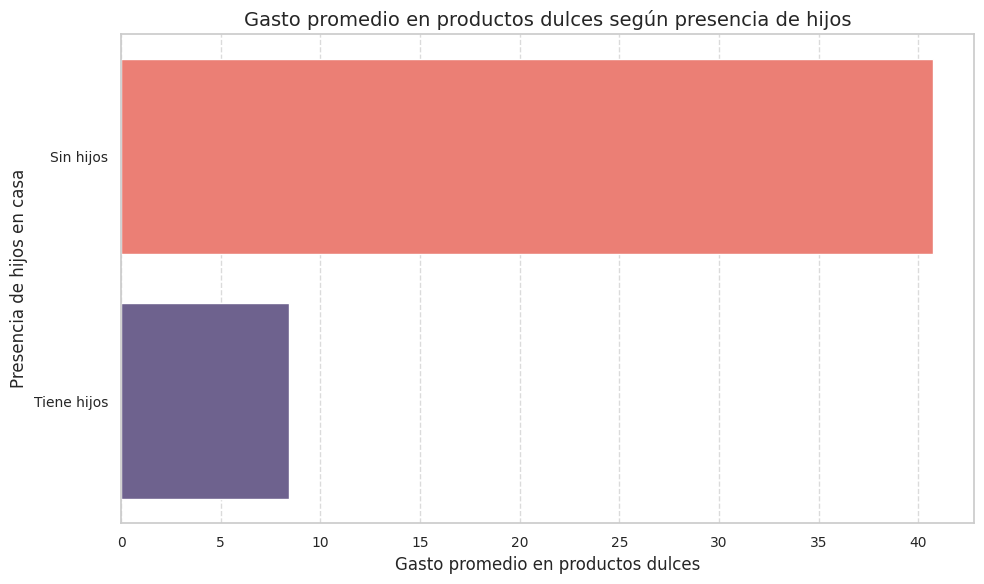


No, las personas con hijos pequeños gastan menos en promedio en productos dulces.


In [18]:
gastos_promedio = df_ifood.groupby('Has_Kid')['MntSweetProducts'].mean().reset_index()
gasto_tiene_hijos = gastos_promedio[gastos_promedio['Has_Kid'] == 'Tiene hijos']['MntSweetProducts'].iloc[0] if 'Tiene hijos' in gastos_promedio['Has_Kid'].values else 0
gasto_sin_hijos = gastos_promedio[gastos_promedio['Has_Kid'] == 'Sin hijos']['MntSweetProducts'].iloc[0] if 'Sin hijos' in gastos_promedio['Has_Kid'].values else 0

plt.figure(figsize=(10, 6))
sns.barplot(x='MntSweetProducts', y='Has_Kid', hue='Has_Kid', data=gastos_promedio, palette=['#FF6F61', '#6B5B95'], legend=False)
plt.title('Gasto promedio en productos dulces según presencia de hijos', fontsize=14)
plt.xlabel('Gasto promedio en productos dulces', fontsize=12)
plt.ylabel('Presencia de hijos en casa', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

if gasto_tiene_hijos > gasto_sin_hijos:
    print(f"\nSí, las personas con hijos pequeños gastan más en promedio en productos dulces.")
elif gasto_tiene_hijos < gasto_sin_hijos:
    print(f"\nNo, las personas con hijos pequeños gastan menos en promedio en productos dulces.")
else:
    print(f"\nEn promedio, el gasto en productos dulces es similar entre personas con y sin hijos pequeños.")


# **Supuesto #4**
¿Cuál es el número total de compras realizadas a través de la web, catálogo y tienda física?

In [39]:
total_compras_web = df_ifood['NumWebPurchases'].sum()
total_compras_catalogo = df_ifood['NumCatalogPurchases'].sum()
total_compras_tienda = df_ifood['NumStorePurchases'].sum()

print(f'Total de compras por web: {total_compras_web}')
print(f'Total de compras por catálogo: {total_compras_catalogo}')
print(f'Total de compras en tienda: {total_compras_tienda}')

Total de compras por web: 9042
Total de compras por catálogo: 5833
Total de compras en tienda: 12841


#**Supuesto #5**
¿Cuál es el promedio de días desde la última compra (Recency) de los clientes? iFoodBD

In [36]:
# Calcular recencia promedio
recencia_promedio = df_ifood['Recency'].mean()
print(f'El promedio de días desde la última compra es: {recencia_promedio:.2f} días')

El promedio de días desde la última compra es: 49.01 días
